# LoC image analysis

This notebook is designed to assess the feasability of segmenting the basal and apical sides of the coculture, with different cell sizes, using the same segmentation run through.

In [1]:
import os
import glob
import enum
from octopusheavy import DaskOctopusHeavyLoader
import napari
from skimage.io import imshow,  imsave, imread
import napari
import btrack
from tqdm.auto import tqdm
import dask.array as da

# Loading images

Define root path and individual experiment IDs

In [2]:
root_path = '/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/home/shared/Lung on chip/Light microscopy'

In [3]:
expt_IDs = ['co-culture/iVECs+iAT2AT1/Folder_20220808/A2-A5/analysis_20221125/DAPI-SPC-PDPN-ZO1/_20220808_kolf-WT_co-culture_20x_A2-A5_Multichannel Z-Stack_20220808_60_/images/',
            'co-culture/iVECs+iAT2AT1/Folder_20220808/A2-A5/analysis_20221125/DAPI-VWF-iCAM1-ZO1/_20220808_kolf-WT_co-culture_20x_A2-A5_Multichannel Z-Stack_20220808_70_/images/',
            'mono-culture/iAT2AT1/for analysis_20221125/DAPI-AQP5-proSPC-ZO1/Day7_static/_20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_150_/images/',
            'mono-culture/iAT2AT1/for analysis_20221125/DAPI-AQP5-proSPC-ZO1/Day14_static/_20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_262_/images/',
            'mono-culture/iAT2AT1/for analysis_20221125/DAPI-CAV1-proSPC-ZO1/Day7_static/_20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_130_/images/',
            'mono-culture/iAT2AT1/for analysis_20221125/DAPI-CAV1-proSPC-ZO1/Day14_static/_20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_253_/images/'
           ]

In [4]:
expt_ID = expt_IDs[0]

In [5]:
images = DaskOctopusHeavyLoader(os.path.join(root_path, expt_ID))

In [6]:
images.channels

[<Channels.CH1: 1>,
 <Channels.CH2: 2>,
 <Channels.CH3: 3>,
 <Channels.CH4: 4>,
 <Channels.MASK1: 99>]

In [7]:
import enum
@enum.unique
class Channels(enum.Enum): ### this is unique to the above acquisition (20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_113.vsi - 005 CF405, CF488, CF561, CF638.tif)
    DAPI = 1
    SPC = 2
    PDPN = 3
    ZO1 = 4
    MASKS = 99

# Segmentation testing

In [8]:
!nvcc --version
!nvidia-smi

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(16,12), dpi=80)

from cellpose import core, utils, io, models, metrics

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Wed Dec  7 14:54:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A6000    On   | 00000000:65:00.0  On |                  Off |
| 35%   57C    P8    36W / 300W |  17053MiB / 49140MiB |      4%      Default |
|                               |                      |                  N/A |
+

<Figure size 1280x960 with 0 Axes>

### Assess sample  image to find apical diameter

/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(


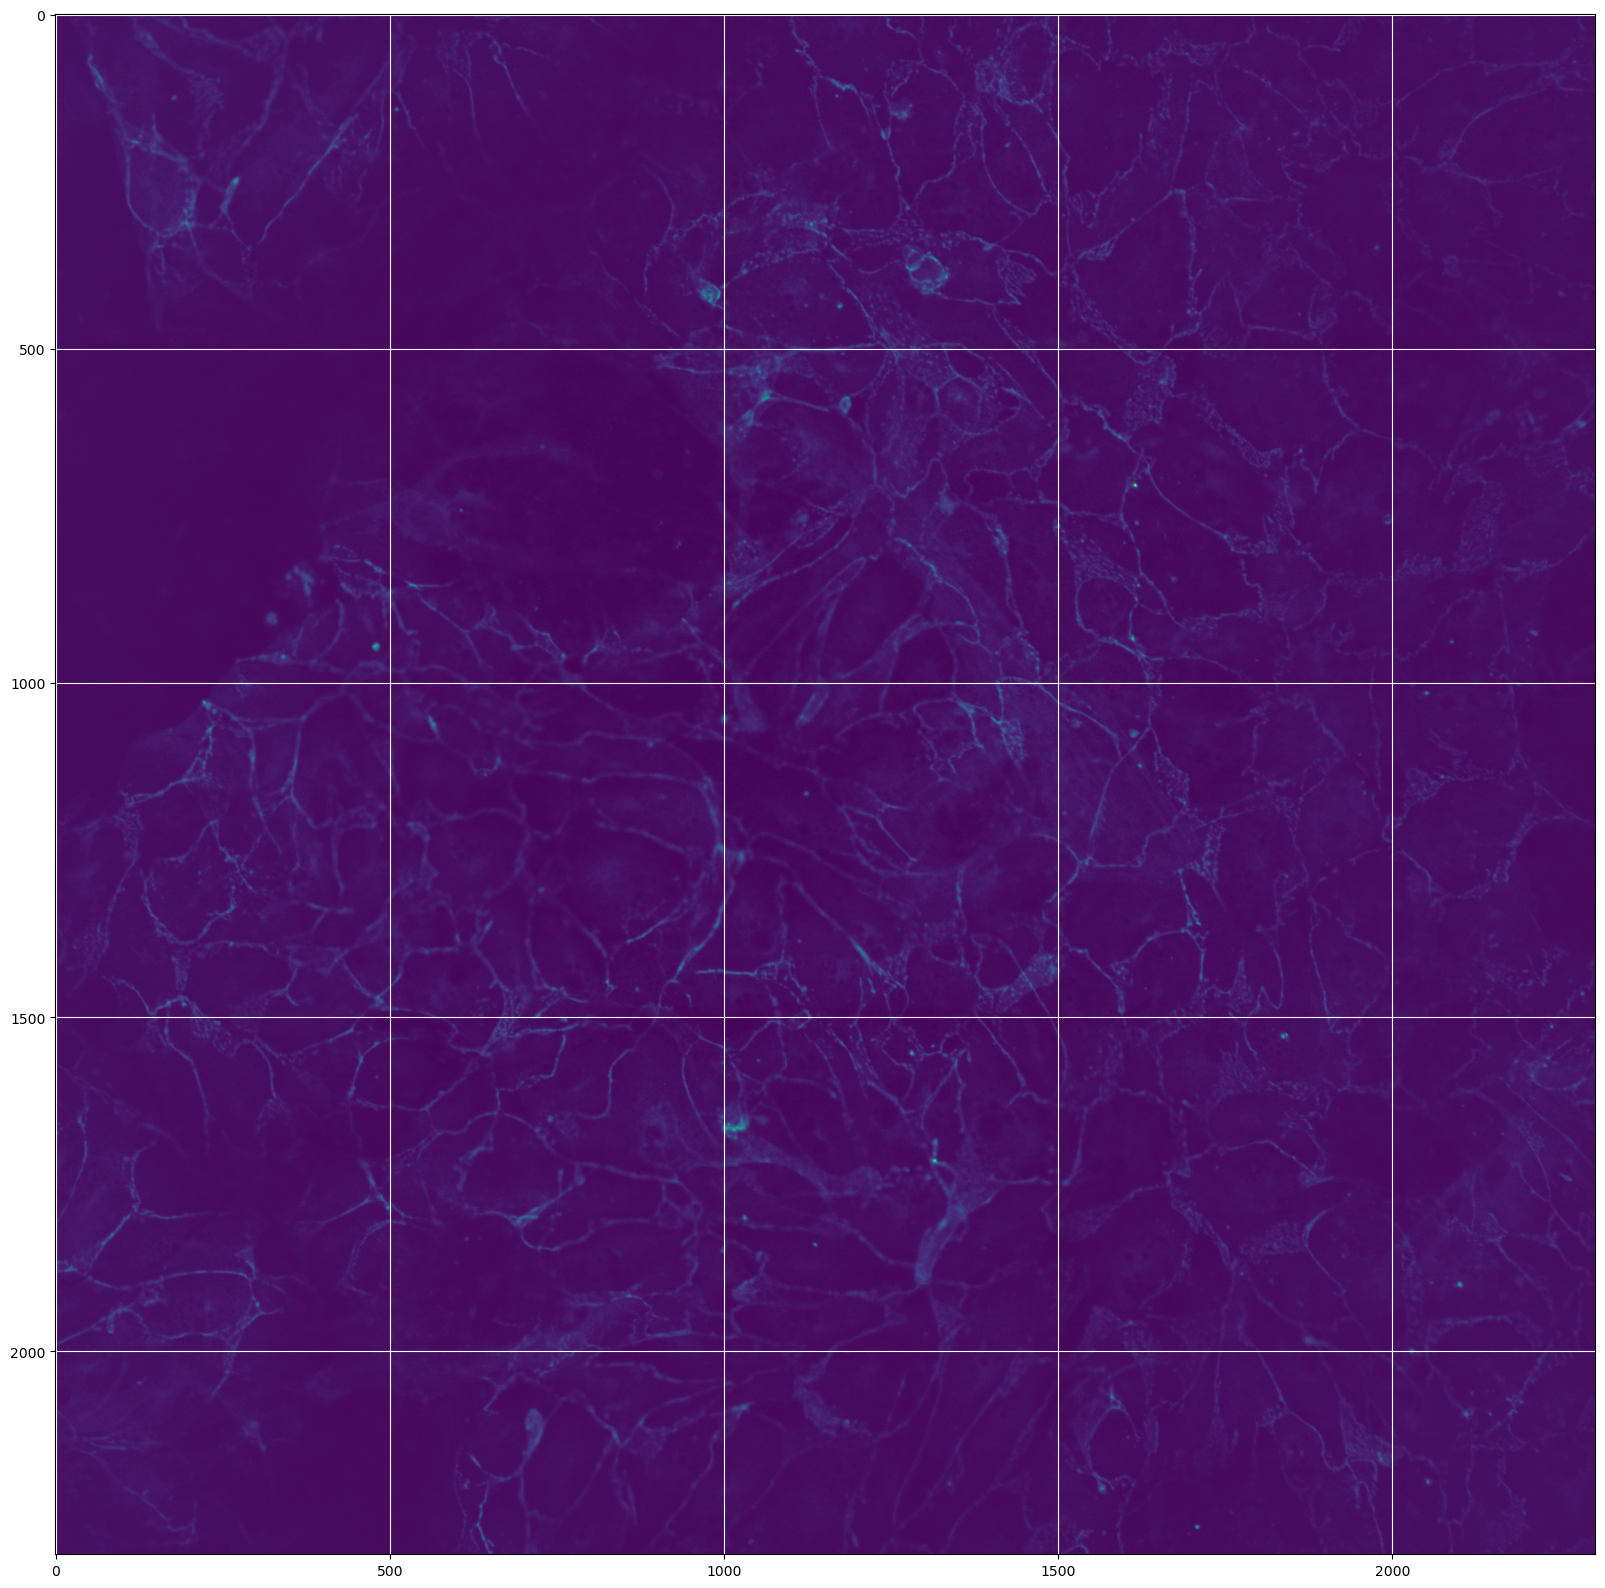

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(images['CH4'][40].compute())
plt.grid(color = 'white')

In [44]:
basal_masks, flows, styles, diams = model.eval(image, 
                                               diameter=100, 
                                               flow_threshold=None, 
                                               channels=channels, 
                                               #progress = True, 
                                               #min_size=2000000
                                              )
imshow(basal_masks)

/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image

In [34]:
i

40

In [ ]:
%%time
# define model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=use_GPU, model_type='cyto')
# define CHANNELS to run segementation on
channels = [0,0]
### define empty mask stack 
basal_mask_stack, apical_mask_stack = [], []
### iterate over frames
for i, (image, fn) in tqdm(enumerate(zip(images['CH4'], images.files('CH4'))), total = len(images['CH4'])):
    ### testing purposes

    if i < 35:
        ### run segmentation
        apical_masks, flows, styles, diams = model.eval(image, 
                                                        diameter=None, 
                                                        flow_threshold=None, 
                                                        channels=channels, 
                                                        #progress = True
                                                       )
        apical_mask_stack.append(apical_masks)
    ### rename and save out
#     fn = fn.replace('c004', 'c099')
#     imsave(fn, masks, check_contrast=False)
    else:
        basal_masks, flows, styles, diams = model.eval(image, 
                                                       diameter=None, 
                                                       flow_threshold=None, 
                                                       channels=channels, 
                                                       #progress = True, 
                                                       min_size=2000
                                                      )

        basal_mask_stack.append(basal_masks)
    
basal_masks = da.stack(basal_mask_stack, axis = 0)
apical_masks = da.stack(apical_mask_stack, axis = 0)

In [46]:
import skimage as ski

/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image

In [14]:
# define model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=use_GPU, model_type='cyto')
# define CHANNELS to run segementation on
channels = [0,0]
import skimage as ski

#  using previous approach DOES NOT WORK

In [16]:
basal_mask_stack = []
apical_mask_stack = []
masks_stack = []
for i, frame in tqdm(enumerate(images['CH4'][25:40]), total = 40-25):
#     if i < 25 or i > 40:
#         continue
    ### get basal mask
    basal_masks, flows, styles, diams = model.eval(frame, diameter=None, flow_threshold=None, channels=channels)
    ### append to mask stack
    basal_mask_stack.append(basal_masks)
    ### binarise 
    basal_masks = (basal_masks > 0)
    ### invert the binary image to zero regions with lots of masks
    basal_masks = ski.util.invert(basal_masks)
    ### remove small holes from mask
    basal_masks = ski.morphology.remove_small_holes(basal_masks, area_threshold=200000)
    ### remove small objects from mask
    basal_masks = ski.morphology.remove_small_objects(basal_masks, min_size=200000)
    ### now gaussian blur to make a mask of broadly unsegmented region
    basal_masks = ski.filters.gaussian(basal_masks, sigma=200, preserve_range=True)
    ### now multiply that mask by the zo1 image 
    apical_frame = frame * basal_masks
    ### now segment that image
    apical_masks, flows, styles, diams = model.eval(apical_frame, diameter=300, flow_threshold=None, channels=channels)
    ### append to apical mask stack
    apical_mask_stack.append(apical_masks)
    ### create new superimposed mask stack
    masks = apical_masks + basal_masks
    masks_stack.append(masks)
mask_stack = da.stack(masks_stack, axis = 0).astype('u2')
apical_mask_stack = da.stack(apical_mask_stack, axis = 0)
basal_mask_stack = da.stack(basal_mask_stack, axis = 0)

  0%|          | 0/15 [00:00<?, ?it/s]

/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image

In [29]:
v = napari.Viewer()

v.add_image(images['CH4'][25:40])#[38:42])
v.add_labels(mask_stack)
v.add_labels(apical_mask_stack)
v.add_labels(basal_mask_stack)


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(


<Labels layer 'basal_mask_stack' at 0x7fc7b95c1be0>

/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image

In [28]:
mask_stack[0].dtype

dtype('uint16')

/home/dayn/analysis/octopusheavy-reader/octopusheavy/reader.py:155: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(


## Testing other params of cellpose

In [39]:
help(model.eval)

Help on method eval in module cellpose.models:

eval(x, batch_size=8, channels=None, channel_axis=None, z_axis=None, invert=False, normalize=True, diameter=30.0, do_3D=False, anisotropy=None, net_avg=False, augment=False, tile=True, tile_overlap=0.1, resample=True, interp=True, flow_threshold=0.4, cellprob_threshold=0.0, min_size=15, stitch_threshold=0.0, rescale=None, progress=None, model_loaded=False) method of cellpose.models.Cellpose instance
    run cellpose and get masks
    
    Parameters
    ----------
    x: list or array of images
        can be list of 2D/3D images, or array of 2D/3D images, or 4D image array
    
    batch_size: int (optional, default 8)
        number of 224x224 patches to run simultaneously on the GPU
        (can make smaller or bigger depending on GPU memory usage)
    
    channels: list (optional, default None)
        list of channels, either of length 2 or of length number of images by 2.
        First element of list is the channel to segment (0=g

In [17]:
mask = apical_masks[43]

In [21]:
from skimage.measure import regionprops

In [26]:
regionprops((mask == 789).astype(int))[0].area.compute()

2470

In [40]:
images['CH4']

dask.array<stack, shape=(81, 2304, 2304), dtype=float32, chunksize=(1, 2304, 2304), chunktype=numpy.ndarray>

In [ ]:
masks, flows, styles, diams = model.eval(images['CH4'], 
                                         diameter=100, 
                                         flow_threshold=None, 
                                         channels=channels, 
                                         progress = True, 
                                         do_3D=True)
